In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

In [3]:
def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols

# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")


df['MHW_category'].fillna("None", inplace=True)


print(df.shape)
print(df.columns)

numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]
print(df_num.shape)
print(df_num.columns)


(4474, 79)
Index(['Sample ID', 'Ammonium', 'Ammonium std', 'BG province', 'Basis',
       'Campaign', 'Chl a', 'Date', 'Date/Time', 'Depth Layer',
       'Depth Layer Zone', 'Depth bathy', 'Depth bot', 'Depth nom',
       'Depth top', 'Event', 'Frac lower', 'Frac upper', 'Functional evenness',
       'Functional richness', 'Iron', 'Iron std', 'Latitude', 'Longitude',
       'MP biome', 'Max Lyapunov Exp', 'Method/Device', 'NPP Carbon',
       'NPP Carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'OS region', 'Okubo-Weiss', 'PIC', 'POC', 'Phosphate max',
       'Phosphate med', 'Phosphate min', 'Radiation', 'Radiation 30',
       'Radiation 8.1', 'Radiation 8.2', 'Residence time', 'SILVA_Chao',
       'SILVA_Shannon', 'SILVA_ace', 'SILVA_func_diversity',
       'SILVA_species_rich', 'Sample label', 'Sample material',
       'Sample method', 'SST', 'Sea ice conc', 'Sea ice free days',
       'Sea ice free end', 'Sea ice free start', 'SS Chl a', 'SS Fluorescence',
  

### Classifier #1 - Categories (None, Moderate, Strong, Severe)

MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Cross-validation scores: [0.265625   0.28348214 0.31696429 0.27678571 0.29753915 0.33333333
 0.27964206 0.30425056 0.26845638 0.2393736 ]
Mean CV accuracy: 0.28654522211569194
              precision    recall  f1-score   support

    Moderate       0.17      0.29      0.22       211
        None       0.78      0.30      0.44      1059
      Severe       0.00      0.00      0.00        10
      Strong       0.03      0.27      0.06        63

    accuracy                           0.30      1343
   macro avg       0.25      0.22      0.18      1343
weighted avg       0.64      0.30      0.38      1343



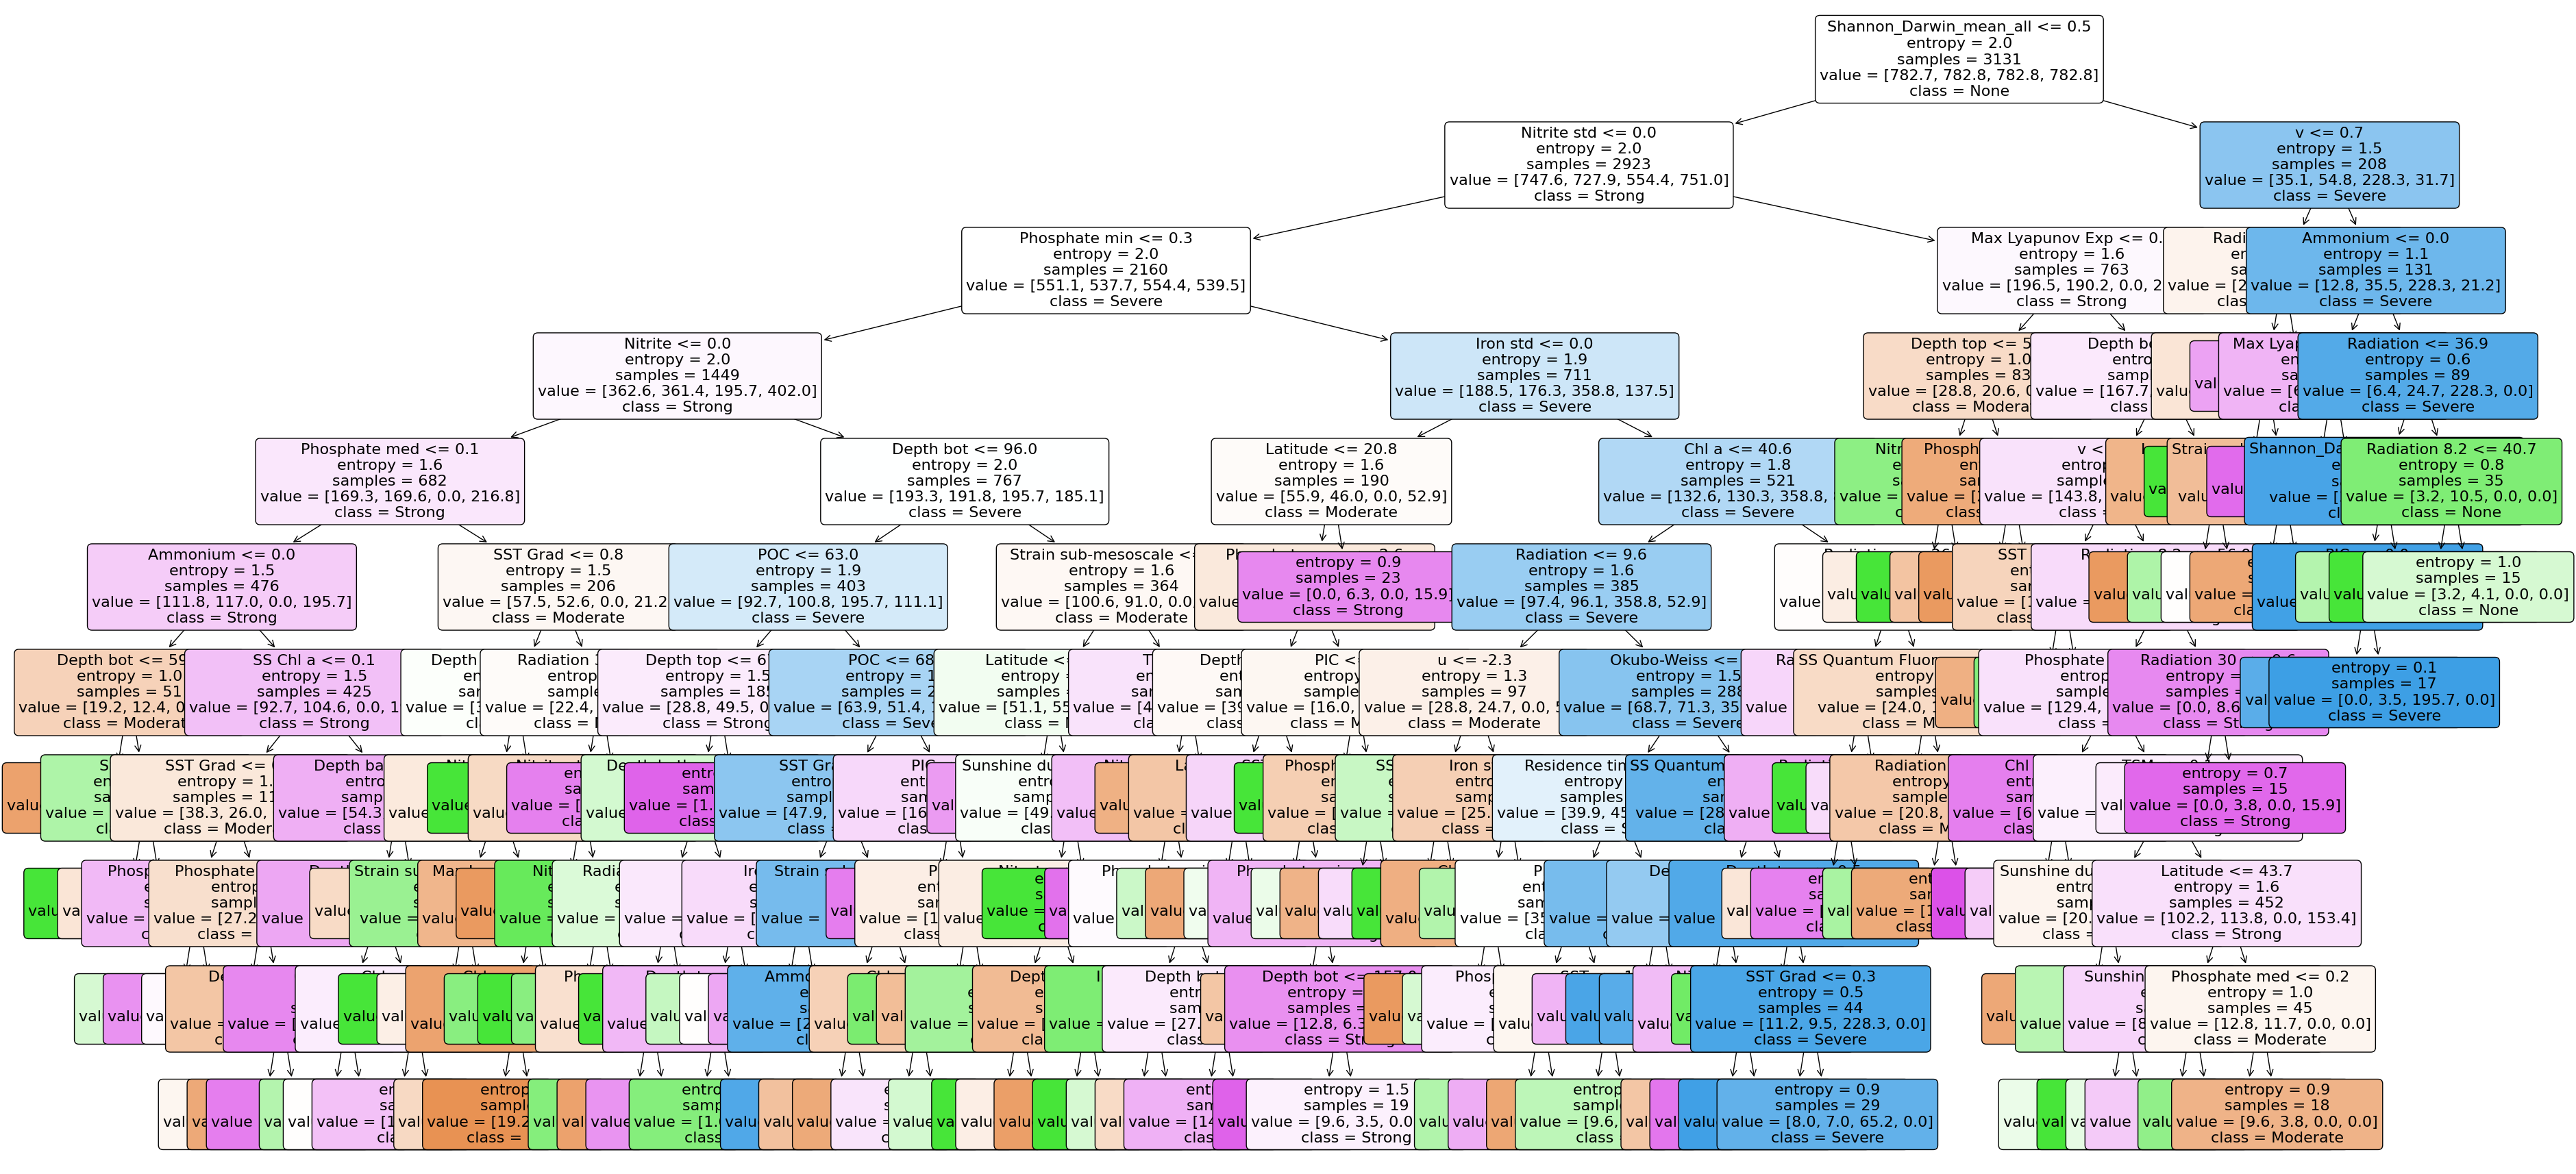

In [4]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]


# Shuffle the DataFrame
shuffled_df = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = DecisionTreeClassifier(random_state=42, 
                             class_weight='balanced',
                             criterion='entropy',
                             max_depth=10, min_samples_split=10,
                             min_samples_leaf=15, max_features=None)

# clf = DecisionTreeClassifier(random_state=22, class_weight='balanced')

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(45,22))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()



### Classifier #2 - Categories (None, Moderate, Strong+)

In [9]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


# Replace values in 'count'
category_replace = {
    'None': 'None',
    'Moderate': 'Moderate',
    'Strong': 'Moderate',
    'Severe': 'Moderate',
}

# Apply replacements to 'MHWs count'
df['MHW_category'] = df['MHW_category'].replace(category_replace)

print(df['MHW_category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]


# Shuffle the DataFrame
shuffled_df = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
#                              max_depth=20, min_samples_split=10,
#                              min_samples_leaf=3)


clf = DecisionTreeClassifier(random_state=32, 
                             class_weight='balanced',
                             criterion='entropy',
                             max_depth=10, min_samples_split=60,
                             min_samples_leaf=30,
                             )

# clf = DecisionTreeClassifier(random_state=22, class_weight='balanced')

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# plt.figure(figsize=(45,22))
# plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
#           class_names=class_names, fontsize=16, precision=1,
#           impurity=True, label='all')
# plt.show()



MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
MHW_category
None        3528
Moderate     946
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Cross-validation scores: [0.58705357 0.39955357 0.50892857 0.42410714 0.63758389 0.44966443
 0.36912752 0.50111857 0.41387025 0.45637584]
Mean CV accuracy: 0.4747383349312879
              precision    recall  f1-score   support

    Moderate       0.21      0.39      0.28       284
        None       0.79      0.61      0.69      1059

    accuracy                           0.57      1343
   macro avg       0.50      0.50      0.48      1343
weighted avg       0.67      0.57      0.60      1343



### Hyperparameter optimizing

In [12]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler



df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_4.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


# Replace values in 'count'
category_replace = {
    'None': 'None',
    'Moderate': 'Moderate',
    'Strong': 'Moderate',
    'Severe': 'Moderate',
}

# category_replace = {
#     'None': 0,
#     'Moderate': 1,
#     'Strong': 2,
#     'Severe': 2,
# }

# Apply replacements to 'MHWs count'
df['MHW_category'] = df['MHW_category'].replace(category_replace)

print(df['MHW_category'].value_counts())

df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df = df[numeric_cols]

# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)


# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, 
                                                    random_state=72)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Instantiate RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to balance the classes
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)


# Define Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             criterion='entropy',
                             )

# Define parameter grid for GridSearchCV
param_grid = {
   'max_depth': [8],
    'min_samples_split': [20],
    'min_samples_leaf': [30],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, 
                           scoring='accuracy', verbose=2)

# grid_search.fit(X_train, y_train)


grid_search.fit(X_train_resampled, y_train_resampled)


# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Train Decision Tree Classifier on full training data with the best hyperparameters
# best_clf.fit(X_train, y_train)


# Train Decision Tree Classifier on full training data with the best hyperparameters
best_clf.fit(X_train_resampled, y_train_resampled)


# Get the class names in the correct order
class_names = best_clf.classes_


# Model Evaluation on test data
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Plot Decision Tree
# plt.figure(figsize=(15, 12))
# plot_tree(best_clf, filled=True, feature_names=X.columns,
#           class_names=class_names, fontsize=10,
#           impurity=False)
# plt.show()


MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
MHW_category
None        3528
Moderate     946
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
(4938, 56) (1343, 56) (4938,) (1343,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=20; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=20; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=20; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=20; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=20; total time=   0.1s
              precision    recall  f1-score   support

    Moderate       0.23      0.63      0.33       284
        None       0.81      0.42      0.55      1059

    accuracy                           0.46      1343
   macro avg       0.52      0.53      0.44    

In [39]:
# Extract results from grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract parameter names
param_names = list(param_grid.keys())

# Create separate columns for each parameter
for param_name in param_names:
    results_df[param_name] = results_df['params'].apply(lambda x: x[param_name])

# Select relevant columns
score_columns = [col for col in results_df.columns if 'mean_test_' in col]
columns_to_keep = param_names + score_columns

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by=score_columns[0], ascending=False)

results_df = results_df[columns_to_keep]

print(results_df['mean_test_score'].max())

best = results_df[results_df['mean_test_score'] > 0.7]

# print(best)

# Sort the results DataFrame by the specified columns
# best = best.sort_values(by=['max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features'], ascending=[True, False, False, True])

# print(best[:15])

# Select the top row (combination with the highest values for min_samples_split and min_samples_leaf,
# and the lowest values for max_depth and max_features)
best_combination = best.iloc[0]

print("Best combination:")
print(best_combination)


0.7016385689721629
Best combination:
max_depth            12.000000
min_samples_split    20.000000
min_samples_leaf     10.000000
mean_test_score       0.701639
Name: 50, dtype: float64


In [56]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score

df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64


In [66]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score

df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


# Replace values in 'count'
category_replace = {
    'None': 'None',
    'Moderate': 'Moderate',
    'Strong': 'Strong+',
    'Severe': 'Strong+',
}


# Apply replacements to 'MHWs count'
df['MHW_category'] = df['MHW_category'].replace(category_replace)

print(df['MHW_category'].value_counts())

df = shuffle(df, random_state=66)

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


# Set the number of iterations
num_iterations = 50

# Define lists to store results
results = []

for i in range(num_iterations):

    # df = shuffle(df, random_state=i)

    # # Separate features (X) and labels (y) after shuffling
    # y = df['MHW_category']

    numeric_cols = numeric_columns(df)

    df = df[numeric_cols]

    # Shuffle the DataFrame with different random_state
    shuffled_df = shuffle(df, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df.drop(['MHW_count'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, 
                                                    random_state=i)


    # Instantiate RandomOverSampler to balance the classes
    ros = RandomOverSampler(random_state=i)

    # Apply RandomOverSampler to balance the classes
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


    # Define Decision Tree Classifier with desired hyperparameters
    clf = DecisionTreeClassifier(random_state=i,
                                 class_weight='balanced',
                                 criterion='gini',
                                 max_depth=12, min_samples_split=20,
                                 min_samples_leaf=10, max_features=None
                                 )

    # Train Decision Tree Classifier on full training data
    clf.fit(X_train_resampled, y_train_resampled)

    # Model Evaluation on test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get feature names and their importance
    feature_importance = clf.feature_importances_
    feature_names = X.columns.tolist()

    # Sort features by importance and select top 10
    sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:40]

    # Append results to the list
    results.append({
        'Iteration': i + 1,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1,
        'Top 20 Important Features': sorted_features
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
# print(results_df)

print(results_df['Accuracy'].mean())



MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
MHW_category
None        3528
Moderate     701
Strong+      245
Name: count, dtype: int64
0.4091288160833954


In [61]:

df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


# Replace values in 'count'
category_replace = {
    'None': 'None',
    'Moderate': 'Moderate',
    'Strong': 'Strong+',
    'Severe': 'Strong+',
}


# Apply replacements to 'MHWs count'
df['MHW_category'] = df['MHW_category'].replace(category_replace)

print(df['MHW_category'].value_counts())

df = shuffle(df, random_state=66)

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


# Define the number of iterations
num_iterations = 100

# Define lists to store feature importance for each iteration
feature_importance_per_iteration = []

for i in range(num_iterations):
    # Shuffle the DataFrame with different random_state
    shuffled_df = shuffle(df, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df.drop(['MHW_count'], axis=1)
    y = shuffled_df['MHW_count']

    # Instantiate RandomOverSampler to balance the classes
    ros = RandomOverSampler(random_state=i)

    # Apply RandomOverSampler to balance the classes
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Define Decision Tree Classifier with desired hyperparameters
    clf = DecisionTreeClassifier(random_state=i,
                                 class_weight='balanced',
                                 max_depth=12, min_samples_split=20,
                                 min_samples_leaf=10, max_features=None)

    # Train Decision Tree Classifier on resampled data
    clf.fit(X_resampled, y_resampled)

    # Append feature importance to the list
    feature_importance_per_iteration.append(clf.feature_importances_)

# Convert the list to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance_per_iteration, columns=X.columns)

# Calculate the standard deviation of feature importance across iterations
feature_importance_std = feature_importance_df.std()

# Sort features by standard deviation
sorted_features_std = feature_importance_std.sort_values(ascending=False)

# Print sorted features with their standard deviation
print(sorted_features_std)


MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
MHW_category
None        3528
Moderate     701
Strong+      245
Name: count, dtype: int64


ValueError: could not convert string to float: 'TARA_G100000588'

In [ ]:
df_cat = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash.csv")

df_cat['MHW-category'].fillna("None", inplace=True)

print(df_cat['MHW-category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df_cat['MHW-category']


numeric_cols = numeric_columns(df_cat)

df_cat = df_cat[numeric_cols]


# Shuffle the DataFrame
shuffled_df_cat = shuffle(df_cat, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_cat.drop(['MHWs'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=8, min_samples_split=30,
                             min_samples_leaf=40, max_features=None)

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(45,22))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()



In [ ]:
df_cat = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash.csv")

df_cat['MHW-category'].fillna("None", inplace=True)

print(df_cat['MHW-category'].value_counts())

df_cat = df.copy()

print(df_cat['MHW-category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df_cat['MHW-category']


numeric_cols = numeric_columns(df_cat)

df_cat = df_cat[numeric_cols]

# Shuffle the DataFrame
shuffled_df_cat = shuffle(df_cat, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_cat.drop(['MHWs'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')


# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
# print(importance_df)


# Plot feature importance for 'MHWs' prediction
plot_feature_importance(importance_df.iloc[:27],
                        "Feature Importance for MHWs categories (top 15)",
                        top_n=15, xlim=(0, 0.20))

# Feature importance per class
class_feature_importance = {}


# Iterate over each class
for class_label in dt.classes_:
    # Get binary labels for current class
    y_train_binary = (y_train == class_label)
    
    # Define Decision Tree Classifier for the current class
    dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Train Decision Tree Classifier on binary labels
    dt_class.fit(X_train, y_train_binary)
    
    # Get feature importances for the current class
    feature_importances_class = dt_class.feature_importances_
    
    # Create a DataFrame to store feature importances for the current class
    class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
    # Sort the DataFrame by importance and select top 5 features
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
    # Store the top 5 feature importances in the dictionary
    class_feature_importance[class_label] = class_importance_df

# # Plot top 5 feature importance for each class
# for class_label, class_importance_df in class_feature_importance.items():
#     plot_feature_importance(class_importance_df,
#                             f'Top 10 Feature Importance for predicting class "{class_label}"',
#                             top_n=10, xlim=(0, 1))



### Classifier - top 5 features (b)

In [ ]:

# Tree based on most important features only
top_features = (-feature_importances).argsort()[:5]
print(top_features)

Z_train = X_train.iloc[:, top_features]
Z_test = X_test.iloc[:, top_features]


dt = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=None, min_samples_split=20,
                             min_samples_leaf=40, max_features=5)

# Fit your DT
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy_2 = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with only top features achieved {round(accuracy_2 * 100, 1)}% accuracy.')

In [ ]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])